In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import yfinance as yf
from pyESN import ESN
import matplotlib.pyplot as plt

In [7]:
stock_symbol = "TSLA"

# Define the date range
start_date = "2019-01-01"
end_date = "2023-01-31"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d' ,progress=False)

amazon = stock_data["Close"].values

In [8]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          sparsity=0.2,
          random_state=23,
          spectral_radius=1.2,
          noise = 0.005)

In [14]:
trainlen = 100

validation_set = []
for i in range(0,100):
    pred_training = esn.fit(np.ones(trainlen),amazon[i:trainlen+i])
    prediction = esn.predict(np.ones(5))
    validation_set.append(prediction[0])
    
def MSE(prediction, actual):
    return np.mean(np.power(np.subtract(np.array(prediction),actual),2))
    
def run_echo(sr, n, window):
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          sparsity=0.2,
          random_state=23,
          spectral_radius=sr,
          noise = n)

    trainlen = 100
    current_set = []
    for i in range(0,100):
        pred_training = esn.fit(np.ones(trainlen),amazon[i:trainlen+i])
        prediction = esn.predict(np.ones(window))
        print(prediction)
        current_set.append(prediction[0])
    current_set = np.reshape(np.array(current_set),(-1,100))
    mse = MSE(current_set, amazon[trainlen:trainlen+100])
    
    return (mse, current_set)

[[12.7595341 ]
 [12.77661866]
 [12.21168479]
 [12.49288169]
 [12.09988172]]
[[12.41204574]
 [12.01137229]
 [12.05491773]
 [11.46607905]
 [11.39718675]]
[[11.91406954]
 [12.51153605]
 [10.78032652]
 [14.47074018]
 [ 9.37255803]]
[[12.34595804]
 [12.07715727]
 [12.26859598]
 [12.22783137]
 [11.98589623]]
[[12.56707925]
 [11.54731332]
 [13.96193073]
 [10.59703056]
 [18.67249605]]
[[11.41860593]
 [11.97234529]
 [11.11660874]
 [11.76819084]
 [11.34054818]]
[[12.16486969]
 [12.15172724]
 [12.486954  ]
 [11.81469116]
 [12.42322958]]
[[12.60434114]
 [12.48149021]
 [12.70952156]
 [12.60872422]
 [12.34417794]]
[[13.64259772]
 [13.3722691 ]
 [13.47673144]
 [13.44839976]
 [13.50390515]]
[[13.3294127 ]
 [12.89820983]
 [12.55333533]
 [12.35303709]
 [12.09359895]]
[[14.15101369]
 [13.94763332]
 [13.74106686]
 [13.52130613]
 [13.41027689]]
[[14.38536981]
 [14.18589074]
 [14.25056442]
 [13.75733301]
 [13.49322245]]
[[13.99050474]
 [13.94918639]
 [13.75975812]
 [13.64648467]
 [13.5454844 ]]
[[14.3785567

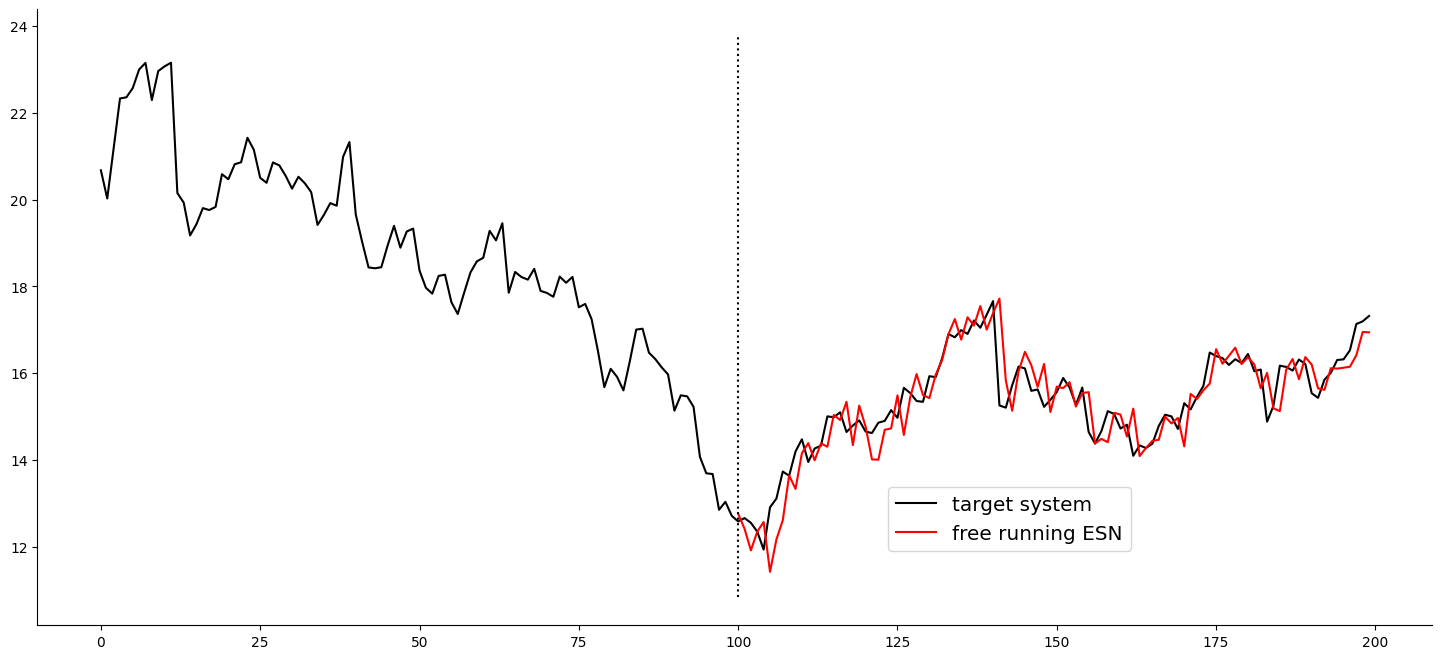

In [15]:
error, validation_set = run_echo(1.2, .005,5)

future = 100
plt.figure(figsize=(18,8))
plt.plot(range(0,trainlen+future),amazon[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+100),validation_set.reshape(-1,1),'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,0.12),fontsize='x-large')

sns.despine();